**Column Details**
- **Unnamed: 0**: Index column, possibly redundant.
- **track_id**: Unique identifier for each track.
- **artists**: Name of the artist(s) performing the track.
- **album_name**: Name of the album the track belongs to.
- **track_name**: Title of the track.
- **popularity**: Popularity score of the track (0-100).
- **duration_ms**: Duration of the track in milliseconds.
- **explicit**: Indicates if the track has explicit content (0 or 1).
- **danceability**: Measure of how suitable a track is for dancing (0-1).
- **energy**: Measure of intensity and activity in a track (0-1).
- **key**: Musical key of the track (0-11, representing C to B).
- **loudness**: Overall loudness of the track in decibels (dB).
- **mode**: Indicates major (1) or minor (0) scale of the track.
- **speechiness**: Presence of spoken words in the track (0-1).
- **acousticness**: Likelihood of the track being acoustic (0-1).
- **instrumentalness**: Degree to which a track is instrumental (0-1).
- **liveness**: Probability of the track being recorded live (0-1).
- **valence**: Musical positivity of the track (0-1).
- **tempo**: Estimated beats per minute (BPM) of the track.
- **time_signature**: Number of beats per measure (typically 3-7).
- **track_genre**: Genre classification of the track.


In [60]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [61]:
# loading the data
df = pd.read_csv(r'/content/songs.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [62]:
df.shape

(114000, 21)

We've got 114k tuples and 21 attributes.

In [63]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

These are the column names we'll be working with.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [6]:
#Let's check if there is any null values in the dataset
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [7]:
#let's remove those tuples
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(114000, 21)
(113999, 21)


In [8]:
#Let's use some of the columns which we won't be using in this work
df.drop(columns=['Unnamed: 0','track_id'], inplace=True)

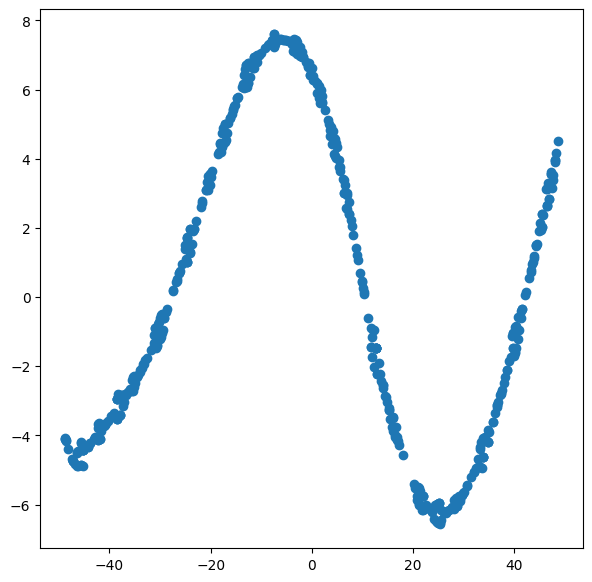

In [9]:
model = TSNE(n_components=2, random_state=42)
tsne_data = model.fit_transform(df[['popularity','duration_ms','danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness']].head(500))
plt.figure(figsize=(7,7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

* We can see there definately is some kind of pattern in the numerical attributes.
* We don't know what the above pattern might mean.

In [10]:
# This is an optional preprocessign step
# Here we'll be converting all the songs' names into lower case so we don't get any silly mismatch name error
df['track_name'] = df['track_name'].apply(lambda x: x.lower())
df['track_name'].head()

,track_name
0,comedy
1,ghost - acoustic
2,to begin again
3,can't help falling in love
4,hold on


In [11]:
# Let's check if there is any duplicate using track names in the dataset
print(df.duplicated(subset=['track_name']).sum())
print(df.shape)

41603
(113999, 19)


* We can see there are a lot of duplicated values in the dataset
* We need to deal with them by removing them
* We could have checked for entire tuples to be dupicated but it might have not been the most accurate since same song name means it's a same song so it is more appropriate to remove the duplicated songs by their name.
* In the meanwhile let's also arrange the songs in order of it's popularity.

In [12]:
# arranging the songs based on popularity
df = df.sort_values(by='popularity', ascending=False)

# removing duplicates
print(df.shape)
df.drop_duplicates(subset=['track_name'],inplace=True)
print(df.shape)

(113999, 19)
(72396, 19)


We are now left with over 73k tuples.

In [13]:
# print((df['track_name'] == 'Hold On').sum())

In [14]:
# Let's separate categorical and numerical columns from the dataset
cols = df.dtypes == 'object'
obj_cols = cols[cols].index
print("Object Columns are : ",obj_cols)
cols = df.dtypes != 'object'
num_cols = cols[cols].index
print("Numerical Columns are : ",num_cols)

Object Columns are :  Index(['artists', 'album_name', 'track_name', 'track_genre'], dtype='object')
Numerical Columns are :  Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


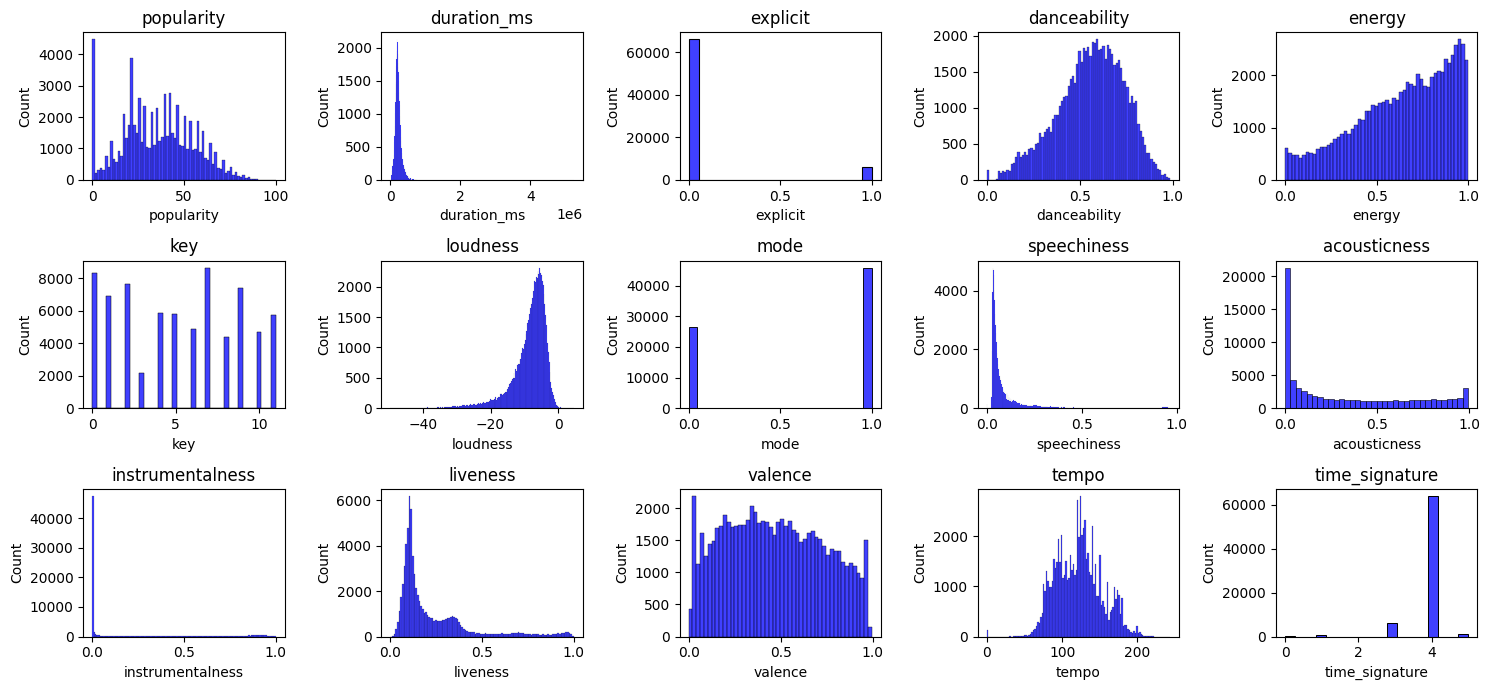

In [15]:
# Let's check the distribution of all the numerical columns
plt.figure(figsize=(15,7))
index = 0
for col in num_cols:
    index += 1
    plt.subplot(3, 5, index)
    sns.histplot(df[col], color='blue')
    plt.title(col)
    plt.tight_layout()
plt.show()

* None of the columns are normally distributed
* We can observe almost all the columns are skewed

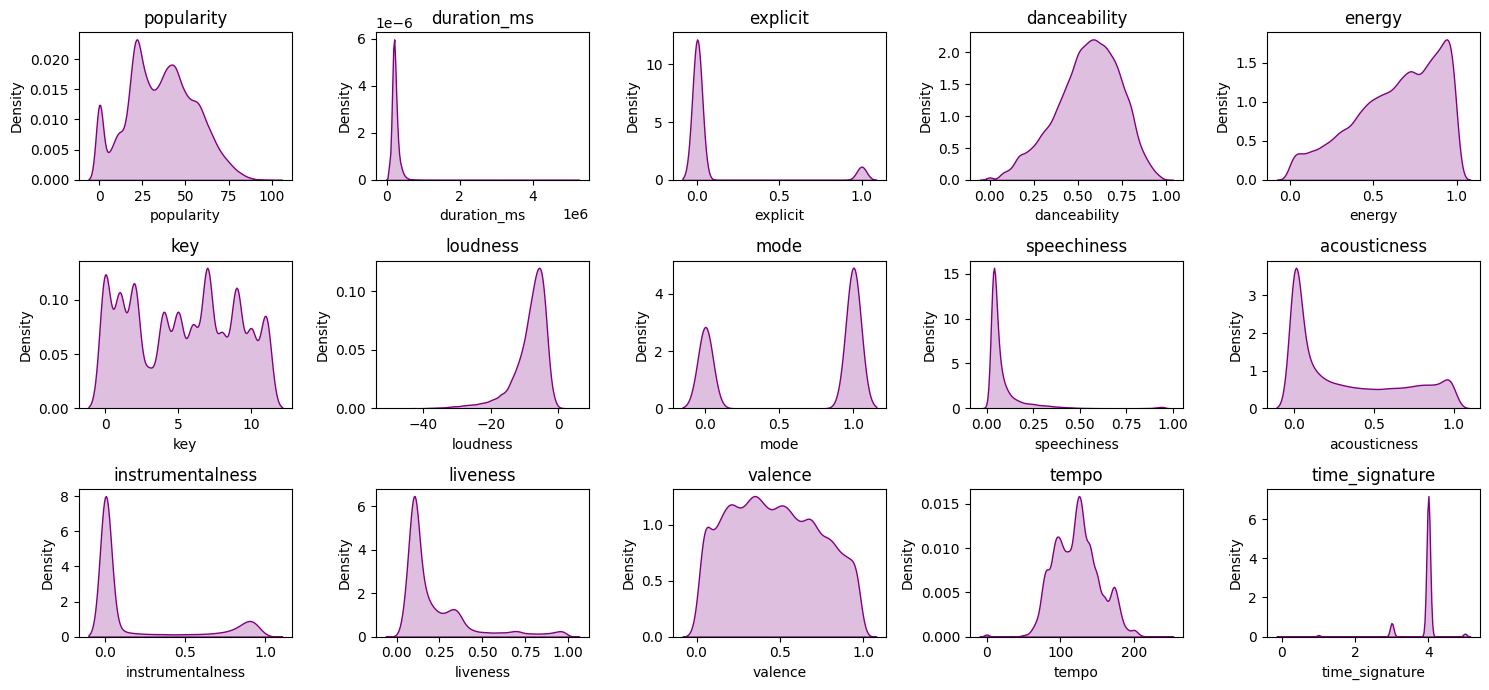

In [16]:
# Let's observe the above same thing with density plot
plt.figure(figsize=(15,7))
index = 0
for col in num_cols:
    index += 1
    plt.subplot(3, 5, index)
    sns.kdeplot(df[col], fill=True, color="purple")
    plt.title(col)
    plt.tight_layout()
plt.show()

* Many columns seems to be one tailed
* Many columns are unimodal, and only a few are bimodal.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

song_vectorizer = CountVectorizer()
song_vectorizer.fit(df['track_genre'])

CountVectorizer()

In [18]:
#Working on the first 10,000 popular songs only

df = df.sort_values(by=['popularity'], ascending=False).head(10000)

In [51]:
def get_similarities(song_name, data):

    #Getting vectors for the input songs
    text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['track_genre']).toarray()
    num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()

    # Storing the similarity for each row of the dataset
    sim = []
    for idx, row in data.iterrows():
        name = row['track_name']

        #getting vector for current song
        text_array2 = song_vectorizer.transform(data[data['track_name'] == name]['track_genre']).toarray()
        num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()

        #Calculating the similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)

    return sim


In [52]:
def recommend_songs(song_name, data=df):
    song_name=song_name.lower()  # Converting the given song name into lowercase to avoid most typos
    #Base case
    if df[df['track_name'] == song_name].shape[0] == 0:
        print("This song is either not so popular or you have entered an invalid name\
        \n Try again with a different song name\n Here is a list of random popular songs that you might like.\n")

        for song in data.sample(n=5)['track_name'].values:
            print(song)
        return

    data['similarity_factor'] = get_similarities(song_name, data)

    data.sort_values(by=['similarity_factor', 'popularity'], ascending=[False, False], inplace=True)

    display(data[['track_name', 'artists']][:7])

In [53]:
recommend_songs('Shape of You')

,track_name,artists
81031,shape of you,Ed Sheeran
81137,blank space,Taylor Swift
81056,khaab,Akhil
62752,カメレオン,King Gnu
65817,life's too short (english version),aespa
65065,blood sweat & tears,BTS
81009,na ja,Pav Dharia


In [46]:
recommend_songs('Hold On')

,track_name,artists
4,hold on,Chord Overstreet
679,black horse and the cherry tree,KT Tunstall
85,guaranteed,Eddie Vedder
475,without a light,Drew Holcomb & The Neighbors
196,world spins madly on,The Weepies;Deb Talan;Steve Tannen
903,yakap,Zack Tabudlo
8,lucky,Jason Mraz;Colbie Caillat


In [54]:
recommend_songs("Love the way you lie")

,track_name,artists
51401,love the way you lie,Eminem;Rihanna
51801,still d.r.e.,Dr. Dre;Snoop Dogg
51450,no role modelz,J. Cole
51023,the last ride,Sidhu Moose Wala
51028,295,Sidhu Moose Wala
51085,us (feat. raja kumari),Sidhu Moose Wala;Raja Kumari
51758,face off,Tech N9ne;Joey Cool;King Iso;Dwayne Johnson


In [57]:
recommend_songs('Randy Ortan Theme')

This song is either not so popular or you have entered an invalid name        
 Try again with a different song name
 Here is a list of random popular songs that you might like.

shape of a dream
coming undone
angel of death
soul of doctor (theme) [from "doctor"]
delusions of saviour


An Example showing none of the songs match

In [56]:
recommend_songs('The Blessing')

,track_name,artists
113058,the blessing,Kari Jobe;Cody Carnes
113072,it is well - live,Bethel Music;Kristene DiMarco
113021,this i believe (the creed),Hillsong Worship
113100,build my life,Housefires
113056,the blessing - live,Kari Jobe;Cody Carnes;Elevation Worship
113178,god of revival - live,Bethel Music;Brian Johnson;Jenn Johnson
113107,champion - live,Bethel Music;Dante Bowe


* The first song is itself since it has the highest similarity of course.
* Other recommendations are the best similar ones you could find based on the popular 10,000 songs from the dataset.

Thank you so much for going through my work till the end, feel free to get in touch if you ahve any doubts... :)